In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

In [2]:
data = "../../DataSets/Reg_Logistic/ChurnData.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [5]:
df.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
108,32.0,34.0,0.0,38.0,1.0,10.0,0.0,1.0,0.0,7.35,...,0.0,0.0,0.0,0.0,1.0,1.995,3.240,3.638,2.0,0.0
133,16.0,54.0,20.0,147.0,1.0,29.0,0.0,1.0,0.0,6.95,...,0.0,0.0,1.0,1.0,0.0,1.939,3.146,4.990,3.0,0.0
183,51.0,49.0,29.0,45.0,1.0,16.0,0.0,1.0,0.0,15.70,...,0.0,0.0,1.0,0.0,0.0,2.754,3.240,3.807,1.0,0.0
181,72.0,55.0,24.0,82.0,3.0,25.0,1.0,1.0,0.0,62.30,...,0.0,0.0,1.0,0.0,1.0,4.132,3.240,4.407,2.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0


In [6]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_8636\1238991819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


In [7]:
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [8]:
churn_df.shape

(200, 10)

In [9]:
x = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:3]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.]])

In [10]:
y = np.asarray(churn_df['churn'])
y[0:3]

array([1, 1, 0])

In [11]:
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
x_scaled[:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [13]:
reg_logistic = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)

In [14]:
y_predicted = reg_logistic.predict(x_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [15]:
y_perdProbability = reg_logistic.predict_proba(x_test)
y_perdProbability

array([[0.85690857, 0.14309143],
       [0.8697156 , 0.1302844 ],
       [0.76166698, 0.23833302],
       [0.90407428, 0.09592572],
       [0.73013344, 0.26986656],
       [0.51687948, 0.48312052],
       [0.62528805, 0.37471195],
       [0.87343004, 0.12656996],
       [0.41738015, 0.58261985],
       [0.90879227, 0.09120773],
       [0.91197227, 0.08802773],
       [0.94638922, 0.05361078],
       [0.46056268, 0.53943732],
       [0.50728319, 0.49271681],
       [0.85969108, 0.14030892],
       [0.83853006, 0.16146994],
       [0.69422555, 0.30577445],
       [0.83555304, 0.16444696],
       [0.76818077, 0.23181923],
       [0.63304223, 0.36695777],
       [0.86342114, 0.13657886],
       [0.6537177 , 0.3462823 ],
       [0.93254727, 0.06745273],
       [0.5620099 , 0.4379901 ],
       [0.796927  , 0.203073  ],
       [0.95143725, 0.04856275],
       [0.77561377, 0.22438623],
       [0.80906014, 0.19093986],
       [0.59530665, 0.40469335],
       [0.96431506, 0.03568494],
       [0.

In [16]:
jaccard_score(y_test, y_predicted, pos_label = 0)

0.6486486486486487

In [17]:
from sklearn.metrics import classification_report
import itertools

In [27]:
def plot_confusion_matrix(cm, classes, normalize = 'False', cmap = plt.cm.Blues, title='title'):
     """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
     if normalize:
          cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
          print("Normalized confusion matrix")
     else:
          print('Confusion matrix, without normalization')
     print(cm)

     plt.imshow(cm, interpolation = 'nearest', cmap = cmap)           
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     fmt = '.2f' if normalize else 'd'
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predicted, labels=[1,0]))


[[ 3 12]
 [ 1 24]]


Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


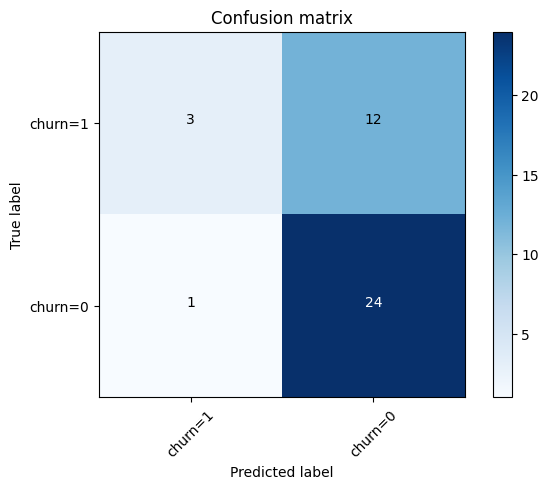

In [28]:
conf_matrix = confusion_matrix(y_test, y_predicted, labels = [1, 0])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(conf_matrix, classes = ['churn=1','churn=0'], normalize = False, title='Confusion matrix' )